<a href="https://colab.research.google.com/github/Girija-Tandon/Python_Analysis/blob/main/Copy_of_Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/smartphone_final.csv')
df.head(5)

,brand,model,price,rating,is_5g,has_nfc,has_ir_blaster,processor_name,processor_brand,num_cores,...,screen_size,resolution_width,resolution_height,refresh_rate,primary_rear_camera,primary_front_camera,num_camera_rear,num_camera_front,expandable_memory,os_name
0,OnePlus,OnePlus 11 5G,54999,89.0,True,True,False,Snapdragon 8 Gen2,snapdragon,Octa Core,...,6.70,1440,3216,120,50.0,16.0,triple,single,0,android
1,OnePlus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,Snapdragon 695,snapdragon,Octa Core,...,6.59,1080,2412,120,64.0,16.0,triple,single,1 TB,android
2,Samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,Exynos 1330,exynos,Octa Core,...,6.60,1080,2408,90,50.0,13.0,triple,single,1 TB,android
3,Motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,Snapdragon 695,snapdragon,Octa Core,...,6.55,1080,2400,120,50.0,16.0,triple,single,1 TB,android
4,Realme,Realme 10 Pro Plus,24999,82.0,True,False,False,Dimensity 1080,dimensity,Octa Core,...,6.70,1080,2412,120,108.0,16.0,triple,single,0,android


In [ ]:
df.shape

(981, 26)

In [ ]:
df.isnull().sum()

,0
brand,0
model,0
price,0
rating,102
is_5g,0
has_nfc,0
has_ir_blaster,0
processor_name,20
processor_brand,20
num_cores,6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   brand                   981 non-null    object 
 1   model                   981 non-null    object 
 2   price                   981 non-null    int64  
 3   rating                  879 non-null    float64
 4   is_5g                   981 non-null    bool   
 5   has_nfc                 981 non-null    bool   
 6   has_ir_blaster          981 non-null    bool   
 7   processor_name          961 non-null    object 
 8   processor_brand         961 non-null    object 
 9   num_cores               975 non-null    object 
 10  processor_speed         740 non-null    float64
 11  ram_memory              981 non-null    float64
 12  battery_capacity        970 non-null    float64
 13  fast_charging           981 non-null    object 
 14  fast_charging_capacity  769 non-null    ob

In [ ]:
df['rating'] = df['rating'].fillna(df['rating'].mean())

In [ ]:
df[['processor_speed', 'primary_front_camera']] = df[['processor_speed', 'primary_front_camera']].fillna(
    df[['processor_speed', 'primary_front_camera']].mean()
)


In [ ]:
df['battery_capacity'] = df['battery_capacity'].fillna(df['battery_capacity'].mean())

In [ ]:
columns_to_fill = ['processor_name', 'expandable_memory', 'processor_brand', 'fast_charging_capacity', 'num_cores']

for col in columns_to_fill:
    mode_value = df[col].mode()[0]  # Most frequent value
    df[col] = df[col].fillna(mode_value)


In [ ]:
df.describe()

,price,rating,processor_speed,ram_memory,battery_capacity,internal_memory,screen_size,resolution_width,resolution_height,refresh_rate,primary_rear_camera,primary_front_camera
count,981.000000,981.000000,981.000000,981.000000,970.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000
mean,32494.386340,78.258248,2.468689,6.554027,4814.327835,140.897044,6.532956,1075.000000,2212.731906,92.223242,50.270031,16.572131
std,39520.105406,7.007021,0.401863,2.749793,1014.626648,107.169190,0.368813,291.242087,519.752883,28.991556,33.020185,10.856383
min,3499.000000,60.000000,1.100000,0.500000,1500.000000,4.000000,2.800000,240.000000,320.000000,60.000000,2.000000,0.000000
25%,12999.000000,75.000000,2.300000,4.000000,4500.000000,64.000000,6.500000,1080.000000,1612.000000,60.000000,24.000000,8.000000
50%,19990.000000,79.000000,2.468689,6.000000,5000.000000,128.000000,6.580000,1080.000000,2400.000000,90.000000,50.000000,16.000000
75%,35489.000000,84.000000,2.600000,8.000000,5000.000000,128.000000,6.670000,1080.000000,2408.000000,120.000000,64.000000,16.000000
max,650000.000000,89.000000,3.220000,18.000000,22000.000000,1024.000000,8.030000,2460.000000,3840.000000,240.000000,200.000000,60.000000


In [ ]:
df.isnull().sum()

,0
brand,0
model,0
price,0
rating,0
is_5g,0
has_nfc,0
has_ir_blaster,0
processor_name,0
processor_brand,0
num_cores,0


In [ ]:
df.columns

Index(['brand', 'model', 'price', 'rating', 'is_5g', 'has_nfc',
       'has_ir_blaster', 'processor_name', 'processor_brand', 'num_cores',
       'processor_speed', 'ram_memory', 'battery_capacity', 'fast_charging',
       'fast_charging_capacity', 'internal_memory', 'screen_size',
       'resolution_width', 'resolution_height', 'refresh_rate',
       'primary_rear_camera', 'primary_front_camera', 'num_camera_rear',
       'num_camera_front', 'expandable_memory', 'os_name'],
      dtype='object')

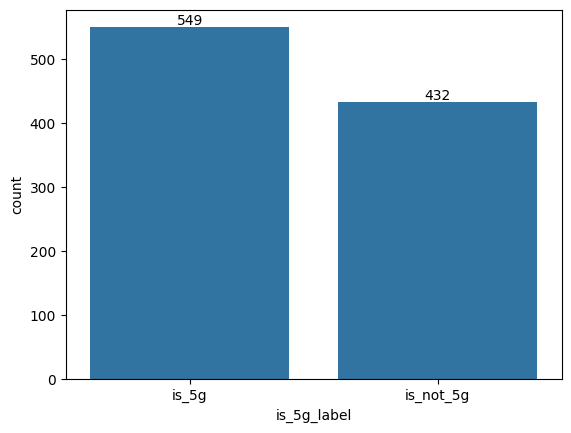

In [ ]:
df['is_5g_label'] = df['is_5g'].replace({
    True: 'is_5g',
    False: 'is_not_5g'
})

g = sns.countplot(x = 'is_5g_label', data = df )
for bars in g.containers:
    g.bar_label(bars)

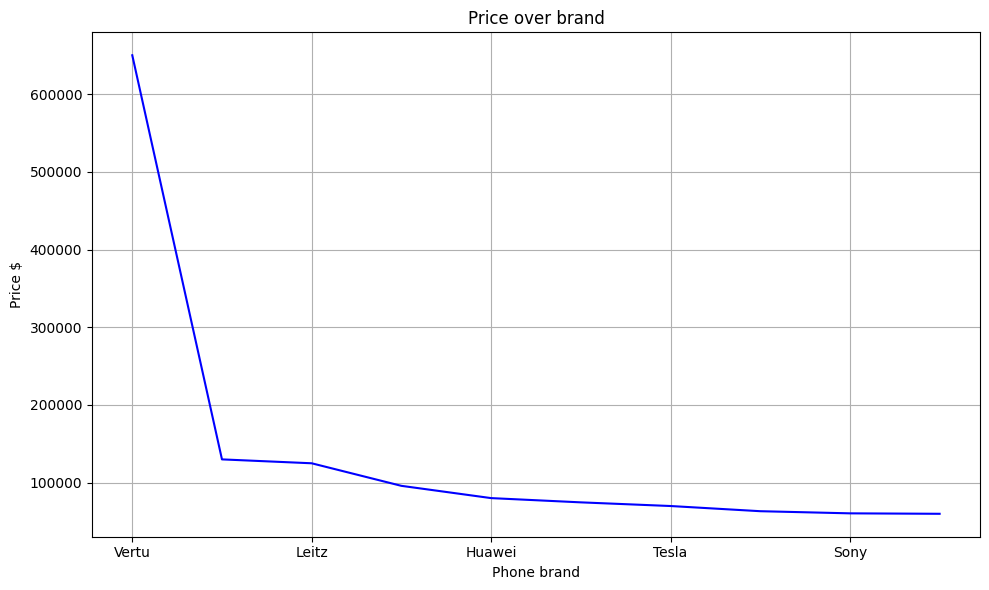

In [ ]:
# Top 10 brands by average price
top_brands = df.groupby('brand')['price'].mean().sort_values(ascending=False).head(10)
df.groupby('brand')['price'].mean().sort_values(ascending=False).head(10)
top_brands.plot(kind='line', figsize=(10, 6), color='blue')
plt.xlabel('Phone brand')
plt.ylabel('Price $')
plt.title('Price over brand')
plt.grid(True)
plt.tight_layout()
plt.show()

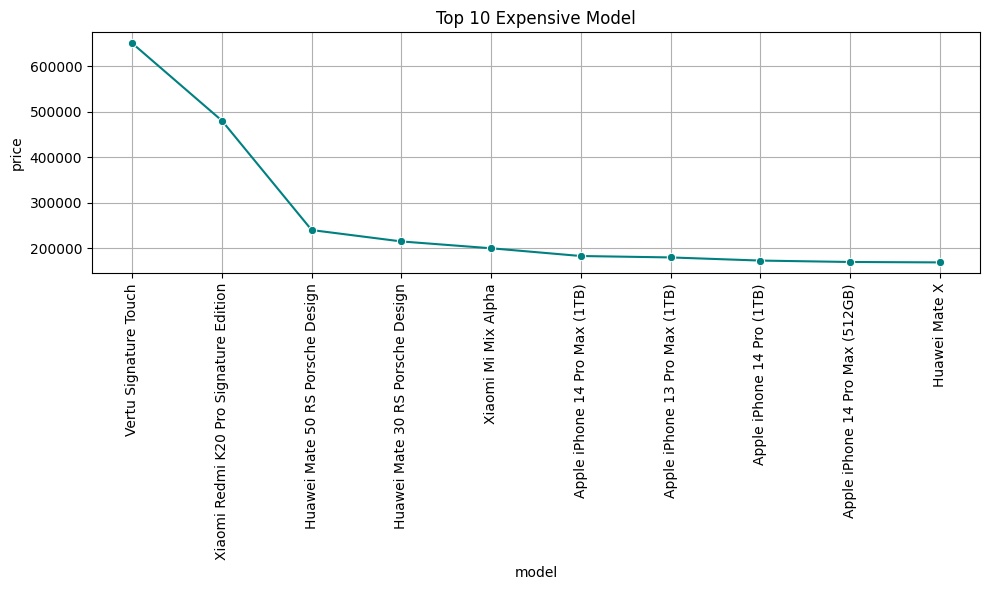

In [ ]:
top_model =df[['model','price']].sort_values(by='price',ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.lineplot(x='model',y='price',data=top_model,marker ='o',color='teal')
plt.xticks(rotation = 90)
plt.title('Top 10 Expensive Model')
plt.grid(True)
plt.tight_layout()
plt.show()

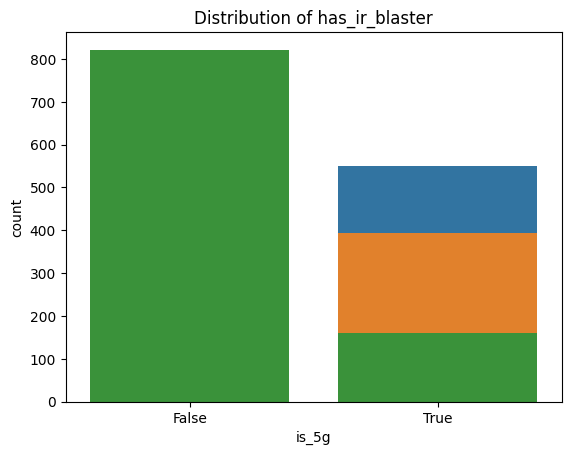

In [ ]:
for col in ['is_5g','has_nfc','has_ir_blaster']:
  sns.countplot(x=col,data=df)
  plt.title(f"Distribution of {col}")
  plt.show

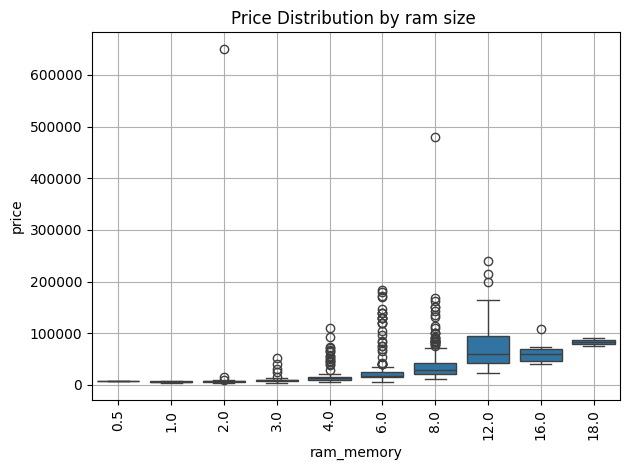

In [ ]:
sns.boxplot(x='ram_memory',y='price',data=df)
plt.title('Price Distribution by ram size ')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

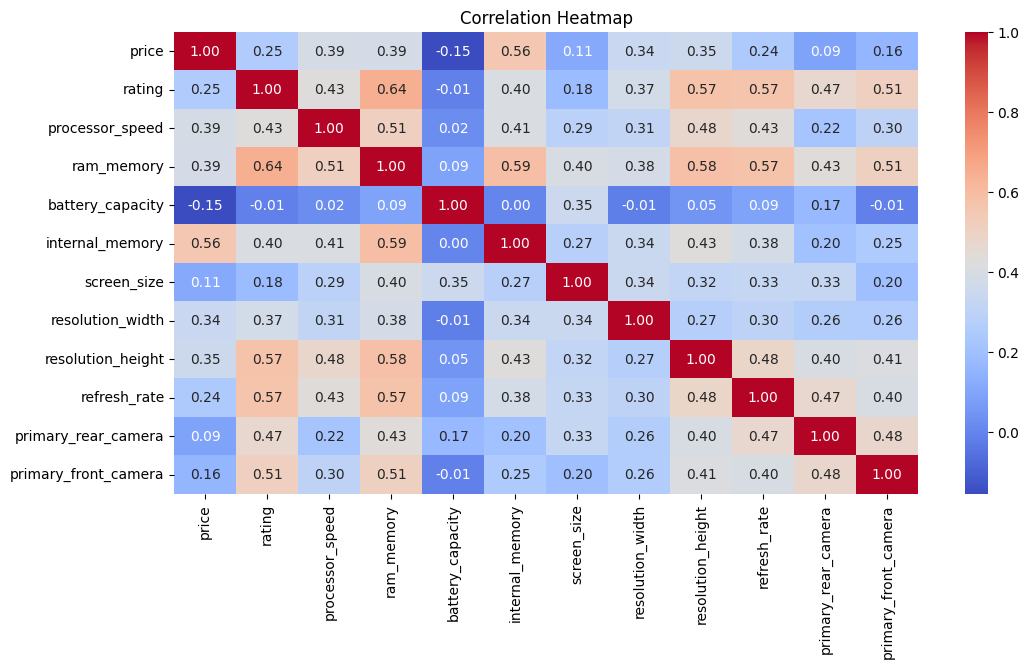

In [ ]:
numeric_col =df.select_dtypes(include=['int64','float']).columns
plt.figure(figsize=(12,6))
sns.heatmap(df[numeric_col].corr(), annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

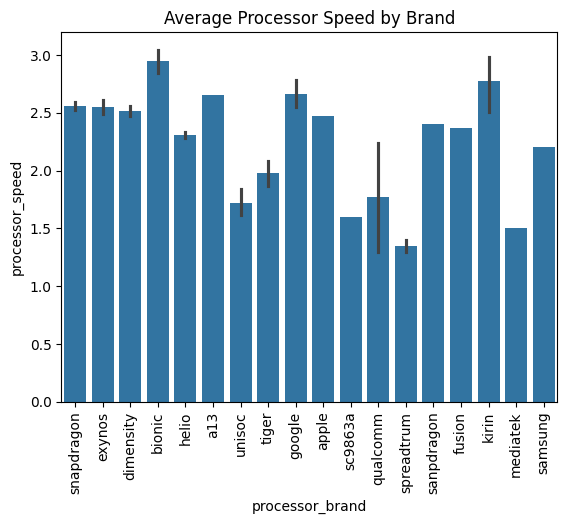

In [ ]:
sns.barplot(x='processor_brand', y='processor_speed',data=df,estimator='mean')
plt.xticks(rotation=90)
plt.title('Average Processor Speed by Brand')
plt.show()

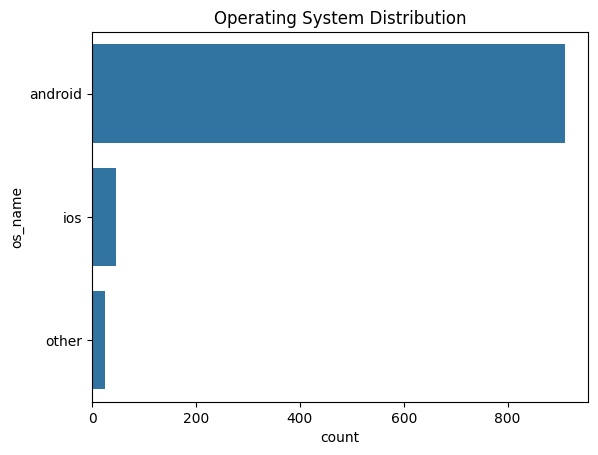

In [ ]:
sns.countplot(y='os_name',data=df,order=df['os_name'].value_counts().index)
plt.title('Operating System Distribution')
plt.show()

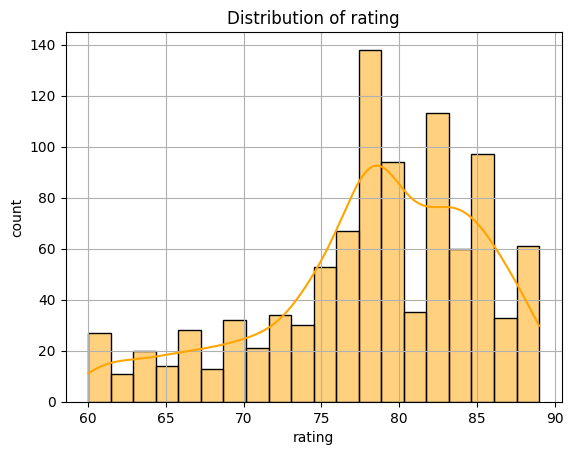

In [ ]:
sns.histplot(df['rating'],bins=20,kde=True,color='orange')
plt.title("Distribution of rating")
plt.xlabel("rating")
plt.ylabel("count")
plt.grid(True)
plt.show()